# Import Modules and Set Data Folder Pathways
Rerun this after each change in data within the \Tensile Testing Data\Data\\ folder

In [52]:
import pandas as pd #used for reading .csv files and transforming data to arrays
import numpy as np #used for math functions and math on arrays 
import matplotlib.pyplot as plt #used for plotting data
import statsmodels.formula.api as smf #used for statistical plotting (not used in this file yet)
import sys #allows for the manipulation of system specific manupulation
import math #imports basic math
import csv #imports .csv file specific read/write options
import re #allows registry searching and string data grabbing
import os #allows misc operation system functions 

#first we define a few variables for different operations
sys.path.insert(0, r'C:\Users\Salty\Desktop\Tensile Testing Data\Data') #sets default system pathway to look for data files in
pi = math.pi #define pi as math.pi (which returns the value of pi)
path = r'C:\Users\Salty\Desktop\Tensile Testing Data\Data\\' #Define path for use in finding each file name
allfiles = os.listdir(path) #create var allfiles containing list of files in directory listed above
files = [files for files in allfiles if files.endswith('.csv')] #code that takes each filename if the file ends with .csv

# Cylindrical Specimen Stress-Strain Curve
Data is prepared by trimming out everything in the .csv except for the lines containing Diameter, Gauge Length, Ext. Gauge Length, and the <br> time/force/displacement data.
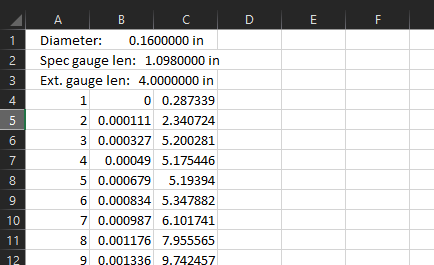

In [5]:
for i in files:
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=3,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with file i opened as var fil
        rows = list(csv.reader(fil)) #row var equal to list of values in csv
        diameter = rows[0][0] #diameter is first value in first column
        length = rows[1][0] #length is second value in first column
        
    #grab numbers from string containing letters and numbers
    di = re.findall("\d+\.*\d+",diameter) #grabs numbers from strings
    lo = re.findall("\d+\.*\d+",length)
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    di = di[0] 
    lo = lo[0] 

    #now we convert the strings into float numbers that we can do math with
    di = float(di)
    lo = float(lo)
    
    #calculate area (used pi r^2 because I forgot how to do it with diam, but pi/4*D^2 works as well)
    r = di/2
    r2= math.pow(r,2) #use math to do r^2
    A = pi*r2
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    Strain = ((d+lo)/lo) - 1
    
    #for analysis outside of python, we need stress and strain data in .csv format
    dxtract = pd.DataFrame({ 'Strain' : Strain,'Stress' : Stress}) #create variable containing S-S data in columns
    open('Extract_%s.csv' %name, "a") #open (create if not found) file Extract_originalfilename for us to manipulate
    dxtract.to_csv('Extract_%s.csv' %name) # write data from dxtract to our csv Extract_originalfilename
    
    #now we plot the data and save each plot
    plt.plot(Strain, Stress) #plot data x,y
    plt.title('Stress-Strain of %s' %name) #plot title
    plt.xlabel('Strain') #x label
    plt.ylabel('Stress(lbf/in^2)') #y label
    plt.savefig('StressStrain%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)

<Figure size 432x288 with 0 Axes>

# Rectangular Specimen to Stress-Strain Curve
Data is prepared by trimming out everything in the .csv except for the lines containing Width, Thickness, Gauge Length, Ext. gauge length, and the <br>
time/force/displacement data.
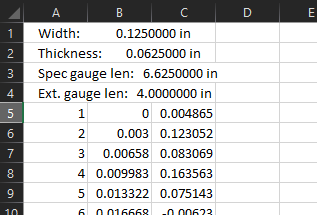


In [2]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=4,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with data opened as variable fil
        rows = list(csv.reader(fil)) #list csv data as an array of two columns named rows
        width = rows[0][0] #width is equal to first cell string data
        thick = rows[1][0] #thickness is the second cell in the first column
        length = rows[2][0] #length (gauge length) is the third cell in the first column
        
    #grab numbers from string containing letters and numbers
    w = re.findall("\d+\.*\d+",width)
    th = re.findall("\d+\.*\d+",thick)
    lo = re.findall("\d+\.*\d+",length)
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    w = w[0]
    th = th[0]
    lo = lo[0]
    
    #now we convert the strings into float numbers that we can do math with
    w = float(w)
    th = float(th)
    lo = float(lo)
    
    #calculate area
    A = w*th
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    Strain = ((d+lo)/lo) - 1
    
    #for analysis outside of python, we need stress and strain data in .csv format
    dxtract = pd.DataFrame({ 'Strain' : Strain,'Stress' : Stress}) #create variable containing S-S data in columns
    open('Extract_%s.csv' %name, "a") #open (create if not found) file Extract_originalfilename for us to manipulate
    dxtract.to_csv('Extract_%s.csv' %name) # write data from dxtract to our csv Extract_originalfilename
    
    #now we plot the data and save each plot
    plt.plot(Strain, Stress) #plot data x,y
    plt.title('Stress-Strain of %s' %name) #plot title
    plt.xlabel('Strain') #x label
    plt.ylabel('Stress(lbf/in^2)') #y label
    plt.savefig('StressStrain%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)
    

<Figure size 432x288 with 0 Axes>

# S-S Recompilation form Extract_Data


In [25]:
for i in files:
    df = pd.read_csv(path+i, delimiter=',', skiprows=0) #import S-S data, not skipping rows and with the header names
    
    #Read in stress and strain data sets to individual columns
    Stress = df['Stress'] 
    Strain = df['Strain']
    
    #get filename
    Splitter = i.split('.') #split path file into array from the . point
    Splitter = Splitter[0].split('_') #since the file starts with extract_, we want to cut that out as well
    name = Splitter[1] #grab string in second place of array as name
    
    #now we plot the data and save each plot
    plt.plot(Strain, Stress) #plot data x,y
    plt.title('Stress-Strain of %s' %name) #plot title
    plt.xlabel('Strain') #x label
    plt.ylabel('Stress(lbf/in^2)') #y label
    plt.savefig('StressStrain%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)
    

<Figure size 432x288 with 0 Axes>

# UTS of Cylindrical

In [ ]:
for i in files:
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=3,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with file i opened as var fil
        rows = list(csv.reader(fil)) #row var equal to list of values in csv
        diameter = rows[0][0] #diameter is first value in first column
        
    #grab numbers from string containing letters and numbers
    di = re.findall("\d+\.*\d+",diameter) #grabs numbers from strings
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    di = di[0] 

    #now we convert the strings into float numbers that we can do math with
    di = float(di)
    
    #calculate area (used pi r^2 because I forgot how to do it with diam, but pi/4*D^2 works as well)
    r = di/2
    r2= math.pow(r,2) #use math to do r^2
    A = pi*r2
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    
    #find and print UTS values
    UTS = np.max(Stress)
    UTS = str(UTS)
    print('UTS for %s is '%name + UTS)

# UTS of Rectangular

In [ ]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=4,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    data1 = csv.reader(open(path+i)) #opens raw csv for width, thickness, and length
    with open(path+i, 'r') as fil: #with data opened as variable fil
        rows = list(csv.reader(fil)) #list csv data as an array of two columns named rows
        width = rows[0][0] #width is equal to first cell string data
        thick = rows[1][0] #thickness is the second cell in the first column
        length = rows[2][0] #length (gauge length) is the third cell in the first column
        
    #grab numbers from string containing letters and numbers
    w = re.findall("\d+\.*\d+",width)
    th = re.findall("\d+\.*\d+",thick)
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    w = w[0]
    th = th[0]
    
    #now we convert the strings into float numbers that we can do math with
    w = float(w)
    th = float(th)

    #calculate area
    A = w*th
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    
    #find and print UTS values
    UTS = np.max(Stress)
    UTS = str(UTS)
    print('UTS for %s is '%name + UTS)

# UTS from S-S Extract

In [26]:
for i in files:
    df = pd.read_csv(path+i, delimiter=',', skiprows=0) #import S-S data, not skipping rows and with the header names
    
    #Read in stress and strain data sets to individual columns
    Stress = df['Stress'] 
    Strain = df['Strain']
    
    #get filename
    Splitter = i.split('.') #split path file into array from the . point
    Splitter = Splitter[0].split('_') #since the file starts with extract_, we want to cut that out as well
    name = Splitter[1] #grab string in second place of array as name
    
    #find and print UTS values
    UTS = np.max(Stress)
    UTS = str(UTS)
    print('UTS for %s is '%name + UTS)

UTS for Can 1 (opened) is 394.0234213


# Toughness for Cylindrical

In [ ]:
for i in files: #iterate through each file, filename i in files list

    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=3,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with file i opened as var fil
        rows = list(csv.reader(fil)) #row var equal to list of values in csv
        diameter = rows[0][0] #diameter is first value in first column
        length = rows[1][0] #length is second value in first column
        
    #grab numbers from string containing letters and numbers
    di = re.findall("\d+\.*\d+",diameter) #grabs numbers from strings
    lo = re.findall("\d+\.*\d+",length)
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    di = di[0] 
    lo = lo[0] 

    #now we convert the strings into float numbers that we can do math with
    di = float(di)
    lo = float(lo)
    
    #calculate area (used pi r^2 because I forgot how to do it with diam, but pi/4*D^2 works as well)
    r = di/2
    r2= math.pow(r,2) #use math to do r^2
    A = pi*r2
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    Strain = ((d+lo)/lo) - 1
    
    #calculate toughness
    areaunder = np.trapz(y=Stress, x=Strain) #uses approximation of integral for stress and strain curve
    areaunder = str(areaunder) #converts raw value into string to be printed
    print('toughness of %s is '%name + areaunder) #print toughness using name of file and data value

# Toughness for Rectangular

In [ ]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=4,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with data opened as variable fil
        rows = list(csv.reader(fil)) #list csv data as an array of two columns named rows
        width = rows[0][0] #width is equal to first cell string data
        thick = rows[1][0] #thickness is the second cell in the first column
        length = rows[2][0] #length (gauge length) is the third cell in the first column
        
    #grab numbers from string containing letters and numbers
    w = re.findall("\d+\.*\d+",width)
    th = re.findall("\d+\.*\d+",thick)
    lo = re.findall("\d+\.*\d+",length)
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    w = w[0]
    th = th[0]
    lo = lo[0]
    
    #now we convert the strings into float numbers that we can do math with
    w = float(w)
    th = float(th)
    lo = float(lo)
    
    #calculate area
    A = w*th
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    Strain = ((d+lo)/lo) - 1
    
    #calculate toughness
    areaunder = np.trapz(y=Stress, x=Strain) #uses approximation of integral for stress and strain curve
    areaunder = str(areaunder) #converts raw value into string to be printed
    print('toughness of %s is '%name + areaunder) #print toughness using name of file and data value

# Operations with S-S Raw Data
Used with Extract_filename files in data folder


# Toughness/Resillience:
Using Stress-Strain data to find toughness (or resillience if the data is manually culled to the elastic region)

In [31]:
for i in files:
    df = pd.read_csv(path+i, delimiter=',', skiprows=0) #import S-S data, not skipping rows and with the header names
    
    #Read in stress and strain data sets to individual columns
    Stress = df['Stress'] 
    Strain = df['Strain']
    
    #get filename
    Splitter = i.split('.') #split path file into array from the . point
    Splitter = Splitter[0].split('_') #since the file starts with extract_, we want to cut that out as well
    name = Splitter[1] #grab string in second place of array as name
    
    #calculate toughness
    areaunder = np.trapz(y=Stress, x=Strain) #uses approximation of integral for stress and strain curve
    areaunder = str(areaunder) #converts raw value into string to be printed
    print('toughness of %s is '%name + areaunder) #print toughness using name of file and data value

toughness of Bottle 1 is 206.2425793722128
toughness of Bottle 2 (opened) is 406.4052832826793
toughness of Can 1 (opened) is 26.8306857611899
toughness of Can 2 (shaken) is 48.415043682634206
toughness of Can 3 is 54.102012871274226
toughness of Copper Pipe is 1653.5796477537742
toughness of CPVC is 281.3802139414554
toughness of Glass Jar is 7.461362553221372
toughness of Marble is 72.62790335638
toughness of PVC is 216.57005638978254


# Compressive Testing

# Compressive Stress-Strain from Area

In [34]:
for i in files:
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=3,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with file i opened as var fil
        rows = list(csv.reader(fil)) #row var equal to list of values in csv
        area = rows[0][0] #diameter is first value in first column
        length = rows[1][0] #length is second value in first column
        
    #grab numbers from string containing letters and numbers
    A = re.findall("\d+\.*\d+",area) #grabs numbers from strings
    lo = re.findall("\d+\.*\d+",length)
    
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    A = A[0] 
    lo = lo[0] 

    #now we convert the strings into float numbers that we can do math with
    A = float(A)
    lo = float(lo)
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    Strain = ((lo+d)/lo) - 1
    
    #for analysis outside of python, we need stress and strain data in .csv format
    dxtract = pd.DataFrame({ 'Strain' : Strain,'Stress' : Stress}) #create variable containing S-S data in columns
    open('Extract_%s.csv' %name, "a") #open (create if not found) file Extract_originalfilename for us to manipulate
    dxtract.to_csv('Extract_%s.csv' %name) # write data from dxtract to our csv Extract_originalfilename
    
    #now we plot the data and save each plot
    plt.plot(Strain, Stress) #plot data x,y
    plt.title('Stress-Strain of %s' %name) #plot title
    plt.xlabel('Strain') #x label
    plt.ylabel('Stress(lbf/in^2)') #y label
    plt.savefig('StressStrain%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)

<Figure size 432x288 with 0 Axes>

# Compressive Stress-Strain from Rectangular

In [14]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=4,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find values to calculate Area
    with open(path+i, 'r') as fil: #with data opened as variable fil
        rows = list(csv.reader(fil)) #list csv data as an array of two columns named rows
        width = rows[0][0] #width is equal to first cell string data
        thick = rows[1][0] #thickness is the second cell in the first column
        length = rows[2][0] #length (gauge length) is the third cell in the first column
        
    #grab numbers from string containing letters and numbers
    w = re.findall("\d+\.*\d+",width)
    th = re.findall("\d+\.*\d+",thick)
    lo = re.findall("\d+\.*\d+",length)
    
    #program thinks w, th, and lo are arrays, so we convert to string by taking the first value from the 'array'
    w = w[0]
    th = th[0]
    lo = lo[0]
    
    #now we convert the strings into float numbers that we can do math with
    w = float(w)
    th = float(th)
    lo = float(lo)
    
    #calculate area
    A = w*th
    
    #create stress and strain columns from our force/area and displacement+lo/lo values
    Stress = f/A
    Strain = ((d+lo)/lo) - 1
    
    #for analysis outside of python, we need stress and strain data in .csv format
    dxtract = pd.DataFrame({ 'Strain' : Strain,'Stress' : Stress}) #create variable containing S-S data in columns
    open('Extract_%s.csv' %name, "a") #open (create if not found) file Extract_originalfilename for us to manipulate
    dxtract.to_csv('Extract_%s.csv' %name) # write data from dxtract to our csv Extract_originalfilename
    
    #now we plot the data and save each plot
    plt.plot(Strain, Stress) #plot data x,y
    plt.title('Stress-Strain of %s' %name) #plot title
    plt.xlabel('Strain') #x label
    plt.ylabel('Stress(lbf/in^2)') #y label
    plt.savefig('StressStrain%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)

<Figure size 432x288 with 0 Axes>

# Flexure Testing

# Circular Geometry


In [48]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=3,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #now we plot the data and save each plot
    plt.plot(d,f) #plot data x,y
    plt.title('Load - Midpoint Deflection of %s' %name) #plot title
    plt.xlabel('Displacement (in)') #x label
    plt.ylabel('Load (lbf)') #y label
    plt.savefig('Load-MidpointDeflect%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)
    
    

<Figure size 432x288 with 0 Axes>

# Rectangular Geometry

In [41]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=4,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #now we plot the data and save each plot
    plt.plot(d,f) #plot data x,y
    plt.title('Load - Midpoint Deflection of %s' %name) #plot title
    plt.xlabel('Displacement (in)') #x label
    plt.ylabel('Load (lbf)') #y label
    plt.savefig('Load-MidpointDeflect%s.png' %name, bbox_inches='tight') #exports png of graph w/ name based on original file
    plt.clf() #close the plot so the next file's data is not written onto the same graph (Unless you want to compare data)

<Figure size 432x288 with 0 Axes>

# Circular Max Force

In [50]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=3,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find and print UTS values
    MaxF = np.max(f)
    MaxF = str(MaxF)
    print('Max Force for %s is '%name + MaxF)

Max Force for Carbon Fiber Rod is 103.012878
Max Force for GLASS is 21.87085
Max Force for STEEL is 230.200302
Max Force for WOOD is 31.677151


# Rectangular Max Force

In [53]:
for i in files: #iterate through each file, filename i in files list
    
    #get data and file name
    df1 = pd.read_csv(path+i, delimiter=',', skiprows=4,header=None) #import file, skip to data
    df = df1.set_axis(['time', 'displacement', 'force'], axis=1) #set headers
    Splitter = i.split('.') #split path file into array from the . point
    name = Splitter[0] #grab first array string from split
    t = df['time'] #split each column from df into individual arrays
    d = df['displacement']
    f = df['force']
    
    #find and print UTS values
    MaxF = np.max(f)
    MaxF = str(MaxF)
    print('Max Force for %s is '%name + MaxF)
    

Max Force for Carbon Fiber Plate is 410.135223
Max Force for Carbon Fiber Rod is 103.012878
Max Force for GLASS is 21.87085
Max Force for STEEL is 230.200302
Max Force for WOOD is 31.677151
